# Vamos aplicar o que aprendemos sobre a classificação hierárquica
*   Complete com o código em falta
*   Sempre que necessário, **substitua** ___

---


[documentação](https://scikit-learn.org/stable/index.html) <br>
dataset: [fonte](https://www.kaggle.com/datasets/dongeorge/seed-from-uci?select=Seed_Data.csv)

---

>[Vamos aplicar o que aprendemos sobre a classificação hierárquica](#scrollTo=7UqvAzOuK_SN)

>[1. Corra a primeira célula de código para obter o dataframe com que vamos trabalhar](#scrollTo=25DtwghMIQqJ)

>>[1.1. analise o dataframe](#scrollTo=0CBwwjoI0v0l)

>[2. Aplique o algoritmo de classificação hierárquica às variáveis](#scrollTo=glt7JqnNdHxk)

>[3. Aplique o algoritmo de classificação hierárquica às observações](#scrollTo=Rq7QOxUC9Y4u)



#1.&nbsp;Corra a primeira célula de código para obter o dataframe com que vamos trabalhar

In [1]:
# faça o upload do ficheiro csv associado à atividade

# vamos importar a biblioteca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# vamos importar o dataframe do ficheiro .csv
df_seed = pd.read_csv("Seed_Data.csv")

## 1.1.&nbsp;analise o dataframe

In [2]:
# veja as 5 primeiras linhas do dataframe
df_seed.head()
# veja a forma do dataframe: quantas linhas, quantas colunas?
df_seed.shape
# veja a informação sobre o dataframe
df_seed.info()
# veja a descrição das variáveis numéricas
df_seed.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


In [3]:
# remova a última coluna do dataframe (target)
target_variable = "target"
X = df_seed.drop([target_variable], axis = 1)

#2.&nbsp;Aplique o algoritmo de classificação hierárquica às variáveis

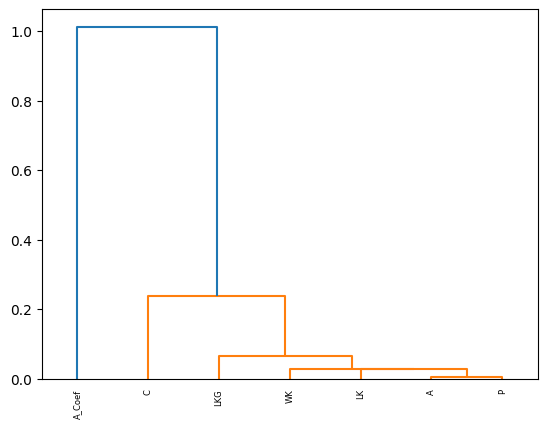

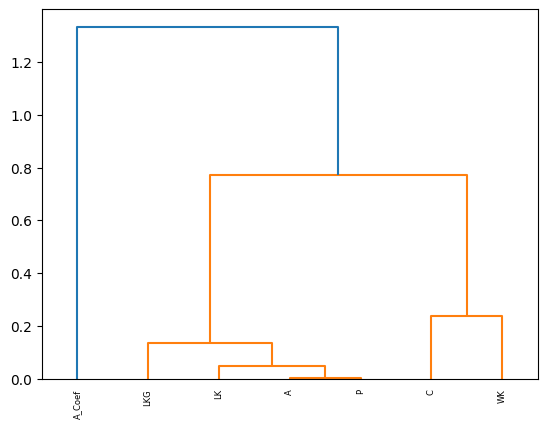

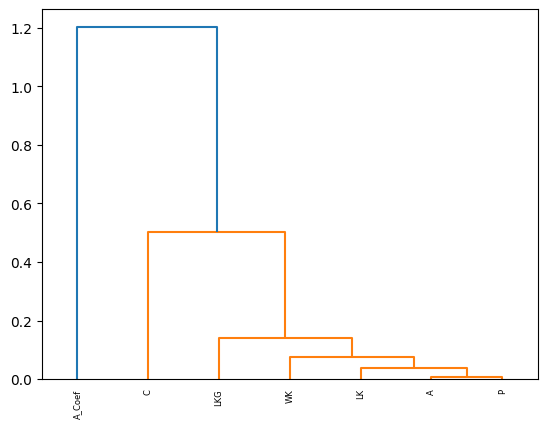

In [4]:
# importe o modelo
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# utilize a transposta (para termos as variáveis como linhas)
X_t = X.values.transpose()

# aplique o modelo, escolhendo o método single e a medida de distância "correlação"
clusters_sl = linkage(X_t, method = 'single', metric = 'correlation')
dendrogram(clusters_sl,
           labels = X.columns,
           leaf_rotation = 90,
           leaf_font_size = 6)
plt.show()

# aplique o modelo, escolhendo o método complete e a medida de distância "correlação"
clusters_cl = linkage(X_t, method = 'complete', metric = 'correlation')
dendrogram(clusters_cl,
           labels = X.columns,
           leaf_rotation = 90,
           leaf_font_size = 6)
plt.show()

# aplique o modelo, escolhendo o método average e a medida de distância "correlação"
clusters_avg = linkage(X_t, method = 'average', metric = 'correlation')
dendrogram(clusters_avg,
           labels = X.columns,
           leaf_rotation = 90,
           leaf_font_size = 6)
plt.show()

In [5]:
# veja as labels para o complete e com um corte a 0.6
labels = fcluster(clusters_cl, 0.6, criterion = 'distance')
labels

array([1, 1, 2, 1, 2, 3, 1], dtype=int32)

#3.&nbsp;Aplique o algoritmo de classificação hierárquica às observações

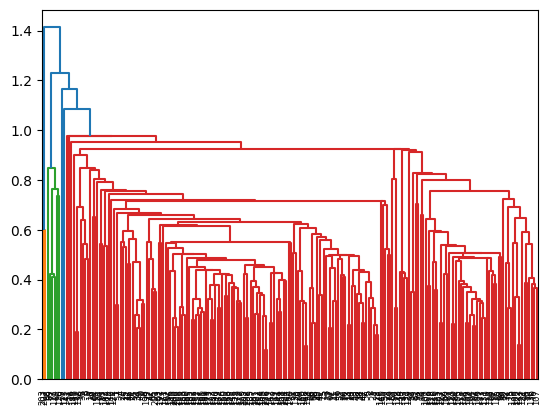

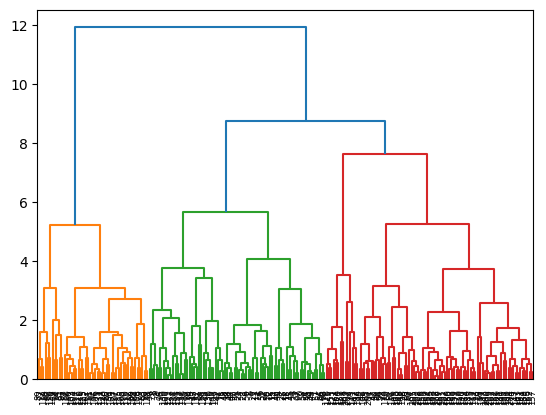

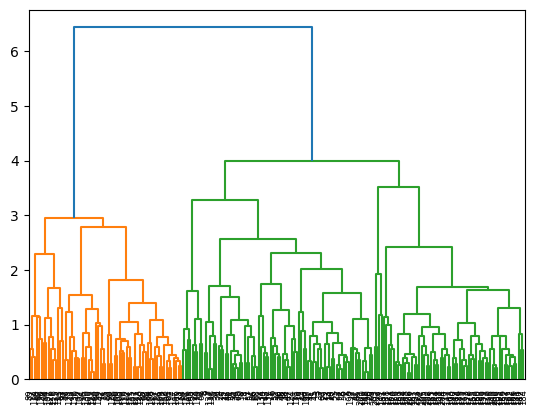

In [6]:
# importe o modelo
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# aplique o modelo, escolhendo o método single e a medida de distância "euclidiana"
clusters_sl = linkage(X, method = 'single', metric = 'euclidean')
dendrogram(clusters_sl,
           labels = X.index,
           leaf_rotation = 90,
           leaf_font_size = 6)
plt.show()

# aplique o modelo, escolhendo o método complete e a medida de distância "euclidiana"
clusters_cl = linkage(X, method = 'complete', metric = 'euclidean')
dendrogram(clusters_cl,
           labels = X.index,
           leaf_rotation = 90,
           leaf_font_size = 6)
plt.show()

# aplique o modelo, escolhendo o método average e a medida de distância "euclidiana"
clusters_avg = linkage(X, method = 'average', metric = 'euclidean')
dendrogram(clusters_avg,
           labels = X.index,
           leaf_rotation = 90,
           leaf_font_size = 6)
plt.show()

In [7]:
# veja as labels para o complete e com um corte a 8
labels = fcluster(clusters_cl, 8, criterion = 'distance')
print(labels)

# vamos comparar com as classes
df_labels = pd.DataFrame({'labels': labels,
                         'classes': df_seed[target_variable]})
df_labels_ctab = pd.crosstab(df_labels['labels'], df_labels['classes'])
df_labels_ctab

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 3 2 2 2 2 2 2
 2 2 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 2 2 2 3 2 2 2 1
 2 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


classes,0,1,2
labels,,,
1,0,47,0
2,52,23,0
3,18,0,70
